# Project 1
## The following code provides the workflow, functions, analysis and insights into Project 1 for group Ma Yinchu

### Deliverable 1 Population Statistics

In [1]:
!pip install wbdata

  Using cached wbdata-1.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached dateparser-1.2.1-py3-none-any.whl.metadata (29 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl.metadata (25 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzlocal-5.2-py3-none-any.whl.metadata (7.8 kB)
Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
Using cached dateparser-1.2.1-py3-none-any.whl (295 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Attempting uninstall: pytz
    Found exist

In [84]:
import pandas as pd
import numpy as np
import wbdata
wbdata.get_topics()
wbdata.get_sources()

In [85]:
indicators = wbdata.get_indicators(source=40)
indicators

In [86]:
sexdict = {'Male':'MA', 'Female':'FE'}
def population(year,sex,age_range,place):
        lower, upper = age_range[0], age_range[1]
        df = population_data_frames(sex, age_range, place).reset_index()
        df = df[df['date'] == f'{year}-01-01'] # selecting relevant year
        df.drop(['date', 'country'], axis=1, inplace=True)
        extra = ((upper - (int(df.columns[-1][-4:-2]))) / 5) * (df.iloc[:,-1].to_list()[0]) # controls for age ranges not on bounds, could change to 
                                                                          # year by year subtraction
        final = df.sum(axis=1) - extra
        return f' There were {final.iloc[0]} {sex.lower()}s living in {place} in {year}'

In [87]:
population(1990, 'Male', (10,33), 'CHN')

' There were 246693887.8 males living in CHN in 1990'

### Deliverable 3 Population Dataframe

In [90]:
def population_data_frames(sex, age_range, place,):
    lower, upper = age_range[0], age_range[1]
    assert upper >= lower, "Invalid date range!" #Part of Deliverable 2
    assert sex in ["Male", "Female", "Both"], "Invalid sex Please use one of the following: Male, Female, Both"
    if sex == "Both":
        return population_data_frames("Male",age_range,place).merge(population_data_frames("Female",age_range,place), on=["date", "country"])
    if upper > 80:
        upper = 'UP'
    if upper == lower + 4:
        label = f'SP.POP.{lower:02d}{upper}.{sexdict[sex]}.IN'
        df = wbdata.get_dataframe(label,country=place,parse_dates=True)
    else:
        yrs = [(x, x+4) for x in range(lower, upper, 5)]
        ranges = [f'{x[0]:02d}{x[1]:02d}' for x in yrs]
        var = [f"SP.POP.{x}.{sexdict[sex]}" for x in ranges]
        feed = {x: f"{sex} {ranges[var.index(x)]}" for x in var} # constructs variable dictionary to be fed to wbdata
        
        df = wbdata.get_dataframe(feed,country=place,parse_dates=True).reset_index()
        df['country'] = place
        df.set_index(['country', 'date'], inplace=True)
    return df

In [91]:
df = population_data_frames("Both", (0,80), 'CHN')
df.head()

,,Male 0004,Male 0509,Male 1014,Male 1519,Male 2024,Male 2529,Male 3034,Male 3539,Male 4044,Male 4549,...,Female 3034,Female 3539,Female 4044,Female 4549,Female 5054,Female 5559,Female 6064,Female 6569,Female 7074,Female 7579
date,country,,,,,,,,,,,,,,,,,,,,,
2023-01-01,CHN,30390275.0,46921541.0,47697475.0,43619845.0,42690196.0,45996968.0,58571312.0,58164459.0,50128672.0,49849324.0,...,52861422.0,54111081.0,47658004.0,48165337.0,60432093.0,56825905.0,37771419.0,39685195.0,31522585.0,18369107.0
2022-01-01,CHN,34407301.0,47977432.0,46945694.0,42880142.0,43079433.0,47322938.0,61347262.0,56040230.0,48623953.0,52814513.0,...,55702933.0,52391805.0,46321543.0,51130200.0,60536192.0,56551300.0,35002089.0,39507542.0,29106909.0,17241445.0
2021-01-01,CHN,38802141.0,48127269.0,46077575.0,42441714.0,43637348.0,48943931.0,63431979.0,54207913.0,47300851.0,55783379.0,...,57929324.0,50904100.0,45150868.0,54098374.0,59738602.0,53597653.0,35660756.0,38793955.0,26676375.0,16375324.0
2020-01-01,CHN,42401148.0,48099312.0,45390757.0,42444894.0,44208685.0,51917714.0,63016755.0,52572479.0,47188710.0,58708249.0,...,57874577.0,49544962.0,45127659.0,57028683.0,58862173.0,48420766.0,37969600.0,37695737.0,24481027.0,15706266.0
2019-01-01,CHN,45006875.0,48004396.0,44534610.0,42626158.0,45014490.0,55706672.0,60783908.0,51377332.0,48144457.0,61076492.0,...,56135406.0,48557018.0,46127571.0,59426420.0,57903342.0,43397958.0,40213974.0,35946934.0,22477861.0,15164232.0


### Deliverable 4: Population Pyramids Function

In [92]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

def population_pyramid(df,year):
    """Plots population pyramid given dataframe from population dataframe function and year."""
    year = f"{year}-01-01"
    age_ranges = [f"{i:02d}{i+4:02d}" for i in range(0, 80, 5)]
    age_ranges.append("80UP")
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Population'))
    bins = [go.Bar(x = df.loc[year,:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='blue'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[year,:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]
    py.iplot(dict(data=bins, layout=layout))

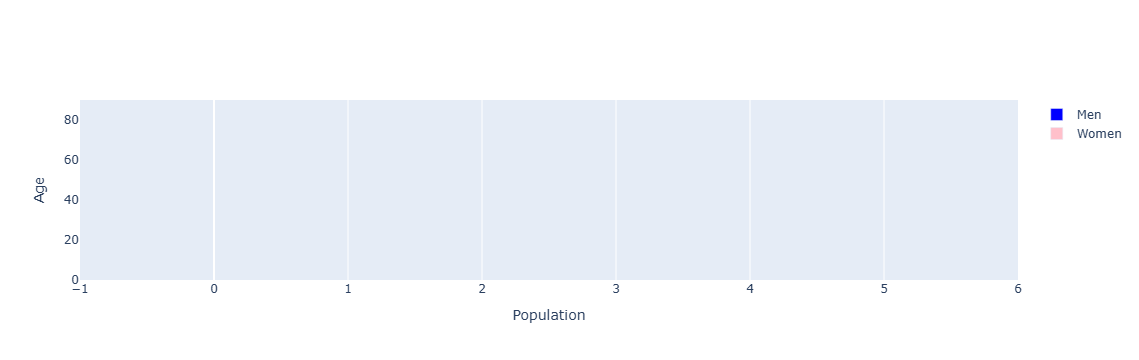

In [93]:
population_pyramid(df, 1990)

### Deliverable 5: Animated Population Pyramids Function

In [35]:
import plotly.graph_objects as go

def population_pyramid_slider(df):
    """Plots animated population pyramid given dataframe from population dataframe function"""
    years = list(range(1960, 2024))

    age_ranges = [f"{i:02d}{i+4:02d}" for i in range(0, 80, 5)]
    age_ranges.append("80UP")
    
    y_values = [int(s[:2]) for s in age_ranges]

    initial_year = years[0]
    initial_year_str = f"{initial_year}-01-01"

    male_population = df.loc[initial_year_str, :].filter(regex="Male").values
    female_population = df.loc[initial_year_str, :].filter(regex="Female").values

    bars = [
        go.Bar(
            x=male_population,
            y=y_values,
            orientation='h',
            name='Men',
            marker=dict(color='blue'),
            hoverinfo='x+y'
        ),
        go.Bar(
            x=-female_population,
            y=y_values,
            orientation='h',
            name='Women',
            marker=dict(color='pink'),
            hoverinfo='x+y'
        )
    ]

    frames = []
    for year in years:
        year_str = f"{year}-01-01"
        if year_str in df.index:  
            frame_male = df.loc[year_str, :].filter(regex="Male").values
            frame_female = df.loc[year_str, :].filter(regex="Female").values
        else:
            frame_male = [0] * len(y_values)
            frame_female = [0] * len(y_values)

        frames.append(
            go.Frame(
                data=[
                    go.Bar(x=frame_male, y=y_values),
                    go.Bar(x=-frame_female, y=y_values)
                ],
                name=str(year)
            )
        )

    layout = go.Layout(
        title="Population Pyramid Over Time",
        barmode='overlay',
        yaxis=dict(title='Age', range=[0, max(y_values) + 5]),
        xaxis=dict(title='Population', tickformat=",", showgrid=True),
        bargap=0.1,
        template="plotly_white",
        height=600,
        margin=dict(t=150, b=50),
        updatemenus=[{
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 30},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 1.25,
            "yanchor": "top"
        }],
        sliders=[{
            "active": 0,
            "yanchor": "bottom",
            "xanchor": "left",
            "currentvalue": {"prefix": "Year: ", "font": {"size": 20}},
            "pad": {"b": 0, "t": 100},
            "len": 0.9,
            "x": 0.1,
            "y": 1.15,
            "steps": [
                {"args": [[str(year)], {"frame": {"duration": 300, "redraw": True}, "mode": "immediate"}], "label": str(year), "method": "animate"}
                for year in years
            ]
        }]
    )

    fig = go.Figure(data=bars, layout=layout, frames=frames)
    fig.show()

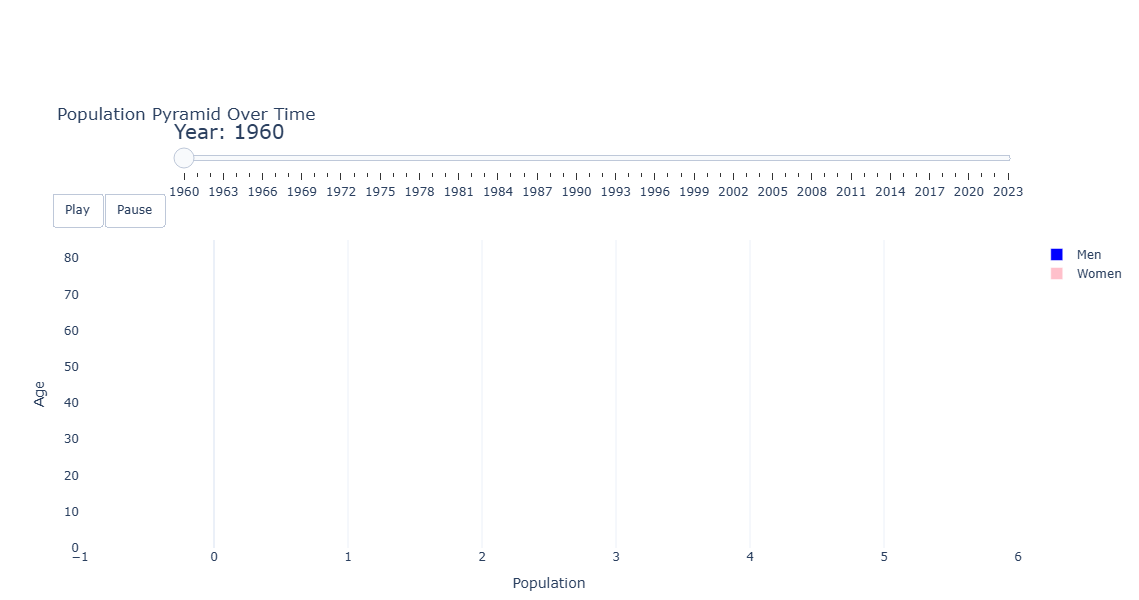

In [36]:
population_pyramid_slider(df)